# Onderzoeksvraag 1

1. **In hoeverre is de prijs van de rit te voorspellen op basis van de andere kenmerken?**
   
In dit segment onderzoeken we welke kenmerken in onze dataset kunnen bijdragen aan het ontwikkelen van een model dat de prijs van een taxirit nauwkeurig kan voorspellen.
Omdat wij de categorie "price" willen gaan predicten gaan wij een regressie model toepassen.

- <a href="#L_importeren">Librarys importeren</a>
- <a href="#Data_analyse">Data-analyse</a>
- <a href="#Data_preprocessing">Data-preprocessing</a>
- <a href="#Model_creeren">Model creëren</a>
    - <a href="#Model_evalueren">Model evalueren</a>
- <a href="#Andere_modellen_evalueren">Andere modellen</a>
- <a href="#Conclusie">Conclusie</a>

<a id ="L_importeren"></a>
## Librarys importeren

In [1]:
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns 
import pandas as pd

In [2]:
df = pd.read_csv("taxi_dataset.csv")
df.head()

,id,name,price,surge_multiplier,timestamp,datetime,timezone,source,destination,latitude,longitude,distance
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,UberXL,12.0,1.0,1.543616e+09,2018-11-30 22:13:01,America/New_York,North End,West End,42.3647,-71.0542,1.11
1,23f145da-f0c1-4d1f-a184-496bc003a7db,Black,16.0,1.0,1.544698e+09,2018-12-13 10:50:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
2,357559cb-8c58-4278-a41a-e33b2e0997a3,UberX,7.5,1.0,1.544729e+09,2018-12-13 19:15:03,America/New_York,North End,West End,42.3647,-71.0542,1.11
3,50ef1165-9d23-416c-a65c-18906207b295,WAV,7.5,1.0,1.545005e+09,2018-12-16 23:55:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,Black SUV,26.0,1.0,1.544748e+09,2018-12-14 00:40:07,America/New_York,North End,West End,42.3647,-71.0542,1.11


## Data Analyze

In [3]:
gemiddelde_waarden = df[['price', 'distance', 'surge_multiplier']].mean()

# Print de gemiddelde waarden
print("Gemiddelde waarden in de dataset:")
print(gemiddelde_waarden)

# Gemiddelde prijs per type taxi
gemiddelde_prijs_per_type = df.groupby('name')['price'].mean()

# Print de gemiddelde prijs per type taxi
print("\nGemiddelde prijs per type taxi:")
print(gemiddelde_prijs_per_type)

Gemiddelde waarden in de dataset:
price               15.795343
distance             2.191386
surge_multiplier     1.000000
dtype: float64

Gemiddelde prijs per type taxi:
name
Black        20.523786
Black SUV    30.286763
Taxi               NaN
UberPool      8.752500
UberX         9.765074
UberXL       15.678144
WAV           9.765019
Name: price, dtype: float64


Hier boven kunnen we zien wat het gemideld kost en wat de gemildeld afstand is dit hebben we gebruikt om een beter begrip te grijgen over de database.

Afhankelijke variabele:

Price: Dit is de variabele die je probeert te voorspellen of te verklaren, dus het is de afhankelijke variabele.

Onafhankelijke variabelen:

Dit zijn de variabelen die kunnen helpen bij het voorspellen van de prijs.

Surge_multiplier: Een verhogingsfactor die aangeeft of er een toeslag is toegepast op de ritprijs.
Timestamp: De UNIX-tijdstempel die aangeeft wanneer de rit plaatsvond.
Datetime: De datum en tijd waarop de rit plaatsvond (afgeleid van de timestamp).
Timezone: De tijdzone waarin de rit plaatsvond.
Source: De vertrekplaats van de rit.
Destination: De bestemming van de rit.
Latitude: De breedtegraad van de locatie (mogelijk relevant voor ruimtelijke analyse).
Longitude: De lengtegraad van de locatie.
Distance: De afstand van de rit.
Name (type of taxi): Het type taxi dat werd gebruikt (bijvoorbeeld UberX, Black SUV).

meetniveau
1. Price: Ratio 
2. Surge_multiplier: Ratio
3. Timestamp: Interval
4. Datetime: Interval
5. Timezone: Nominaal
6. Source: Nominaal
7. Destination: Nominaal
8. Latitude: Interval
9. Longitude: Interval
10. Distance: Ratio
11. Name (type auto): Nominaal

In [4]:
# Controleer of er missende waarden zijn in de dataset
missing_values = df.isnull().sum()

# Print het aantal missende waarden per kolom
print("Aantal missende waarden per kolom:")
print(missing_values)
# Filter de rijen waar de prijs ontbreekt
missende_prijs = df[df['price'].isnull()]

# Bekijk de verschillende taxitypes waarbij de prijs ontbreekt
taxitypes_met_missende_prijs = missende_prijs['name'].value_counts()

# Print de resultaten
print("Taxitypes waarbij de prijs ontbreekt en hoe vaak dat voorkomt:")
print(taxitypes_met_missende_prijs)


Aantal missende waarden per kolom:
id                      0
name                    0
price               55095
surge_multiplier        0
timestamp               0
datetime                0
timezone                0
source                  0
destination             0
latitude                0
longitude               0
distance                0
dtype: int64
Taxitypes waarbij de prijs ontbreekt en hoe vaak dat voorkomt:
name
Taxi    55095
Name: count, dtype: int64


Hier zie je dat er alleen de prijs mist in database van de taxi en we hebben bij het voorspellen van de prijs gekozen om de Taxi er uit te hallen want we kwamen er achten dat de auto naam het meest uitmaakt in hoe duur het wordt. 

In [5]:
# Aantal unieke waarden en frequenties voor 'timezone'
timezone_counts = df['timezone'].value_counts()
print("Aantal voor 'timezone':")
print(timezone_counts)
print("\nAantal unieke 'timezone' waarden:", df['timezone'].nunique())

# Aantal unieke waarden en frequenties voor 'source'
source_counts = df['source'].value_counts()
print("\nAantal voor 'source':")
print(source_counts)
print("\nAantal unieke 'source' waarden:", df['source'].nunique())

# Aantal unieke waarden en frequenties voor 'destination'
destination_counts = df['destination'].value_counts()
print("\nAantal voor 'destination':")
print(destination_counts)
print("\nAantal unieke 'destination' waarden:", df['destination'].nunique())



Aantal voor 'timezone':
timezone
America/New_York    385663
Name: count, dtype: int64

Aantal unieke 'timezone' waarden: 1

Aantal voor 'source':
source
Financial District         32620
Theatre District           32283
Boston University          32144
North End                  32143
Northeastern University    32142
Fenway                     32137
Back Bay                   32137
South Station              32130
Haymarket Square           32122
West End                   32074
Beacon Hill                31939
North Station              31792
Name: count, dtype: int64

Aantal unieke 'source' waarden: 12

Aantal voor 'destination':
destination
Financial District         32613
Theatre District           32262
Haymarket Square           32151
Boston University          32150
North End                  32142
Fenway                     32137
Northeastern University    32136
Back Bay                   32130
South Station              32129
West End                   32081
Beacon Hill        

Hier hebben we gekenen wat allemaal voorkomt in de database en welke belangerijk kunnen zijn voor het voorspellen.

Als eerst gaan we op ongefilterde data een analyze doen

In [6]:
label_encoder = LabelEncoder()

complete_df_encoded = df.copy()
for column in complete_df_encoded.columns:
    if complete_df_encoded[column].dtype == 'object':
        complete_df_encoded[column] = label_encoder.fit_transform(complete_df_encoded[column])

<Axes: title={'center': 'price'}, xlabel='name'>

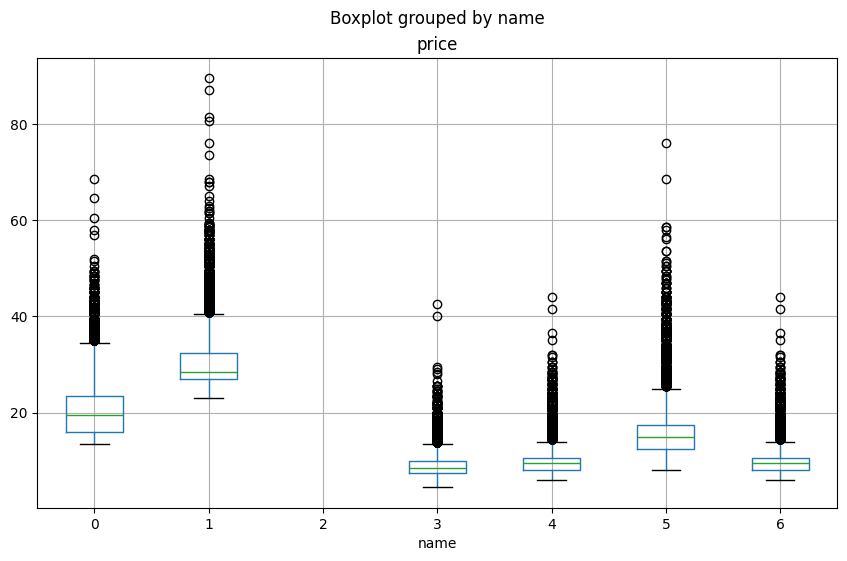

In [7]:
complete_df_encoded.boxplot(column='price', by='name', figsize=(10, 6))

Zoals te zien is in deze boxplot, zijn er veel 'fliers', oftewel uitschieters. Deze uitschieters zullen tijdens het preprocessen worden verwijderd om betere voorspellingsresultaten te verkrijgen. Uitschieters kunnen namelijk invloed hebben op de helling van het regressiemodel.

**Kolommen die worden verwijderd:**
- Id: De kolom Id is voor elke rij uniek. Dit komt waarschijnlijk doordat de dataset uit een database is gehaald.
- Surge multiplier en timezone: Deze kolommen zijn constant en dragen daarom niet bij aan de voorspelling van onze decision trees.
- Datetime: De kolom datetime bevat dezelfde informatie als timestamp, maar dan geformatteerd als een datetime-object.

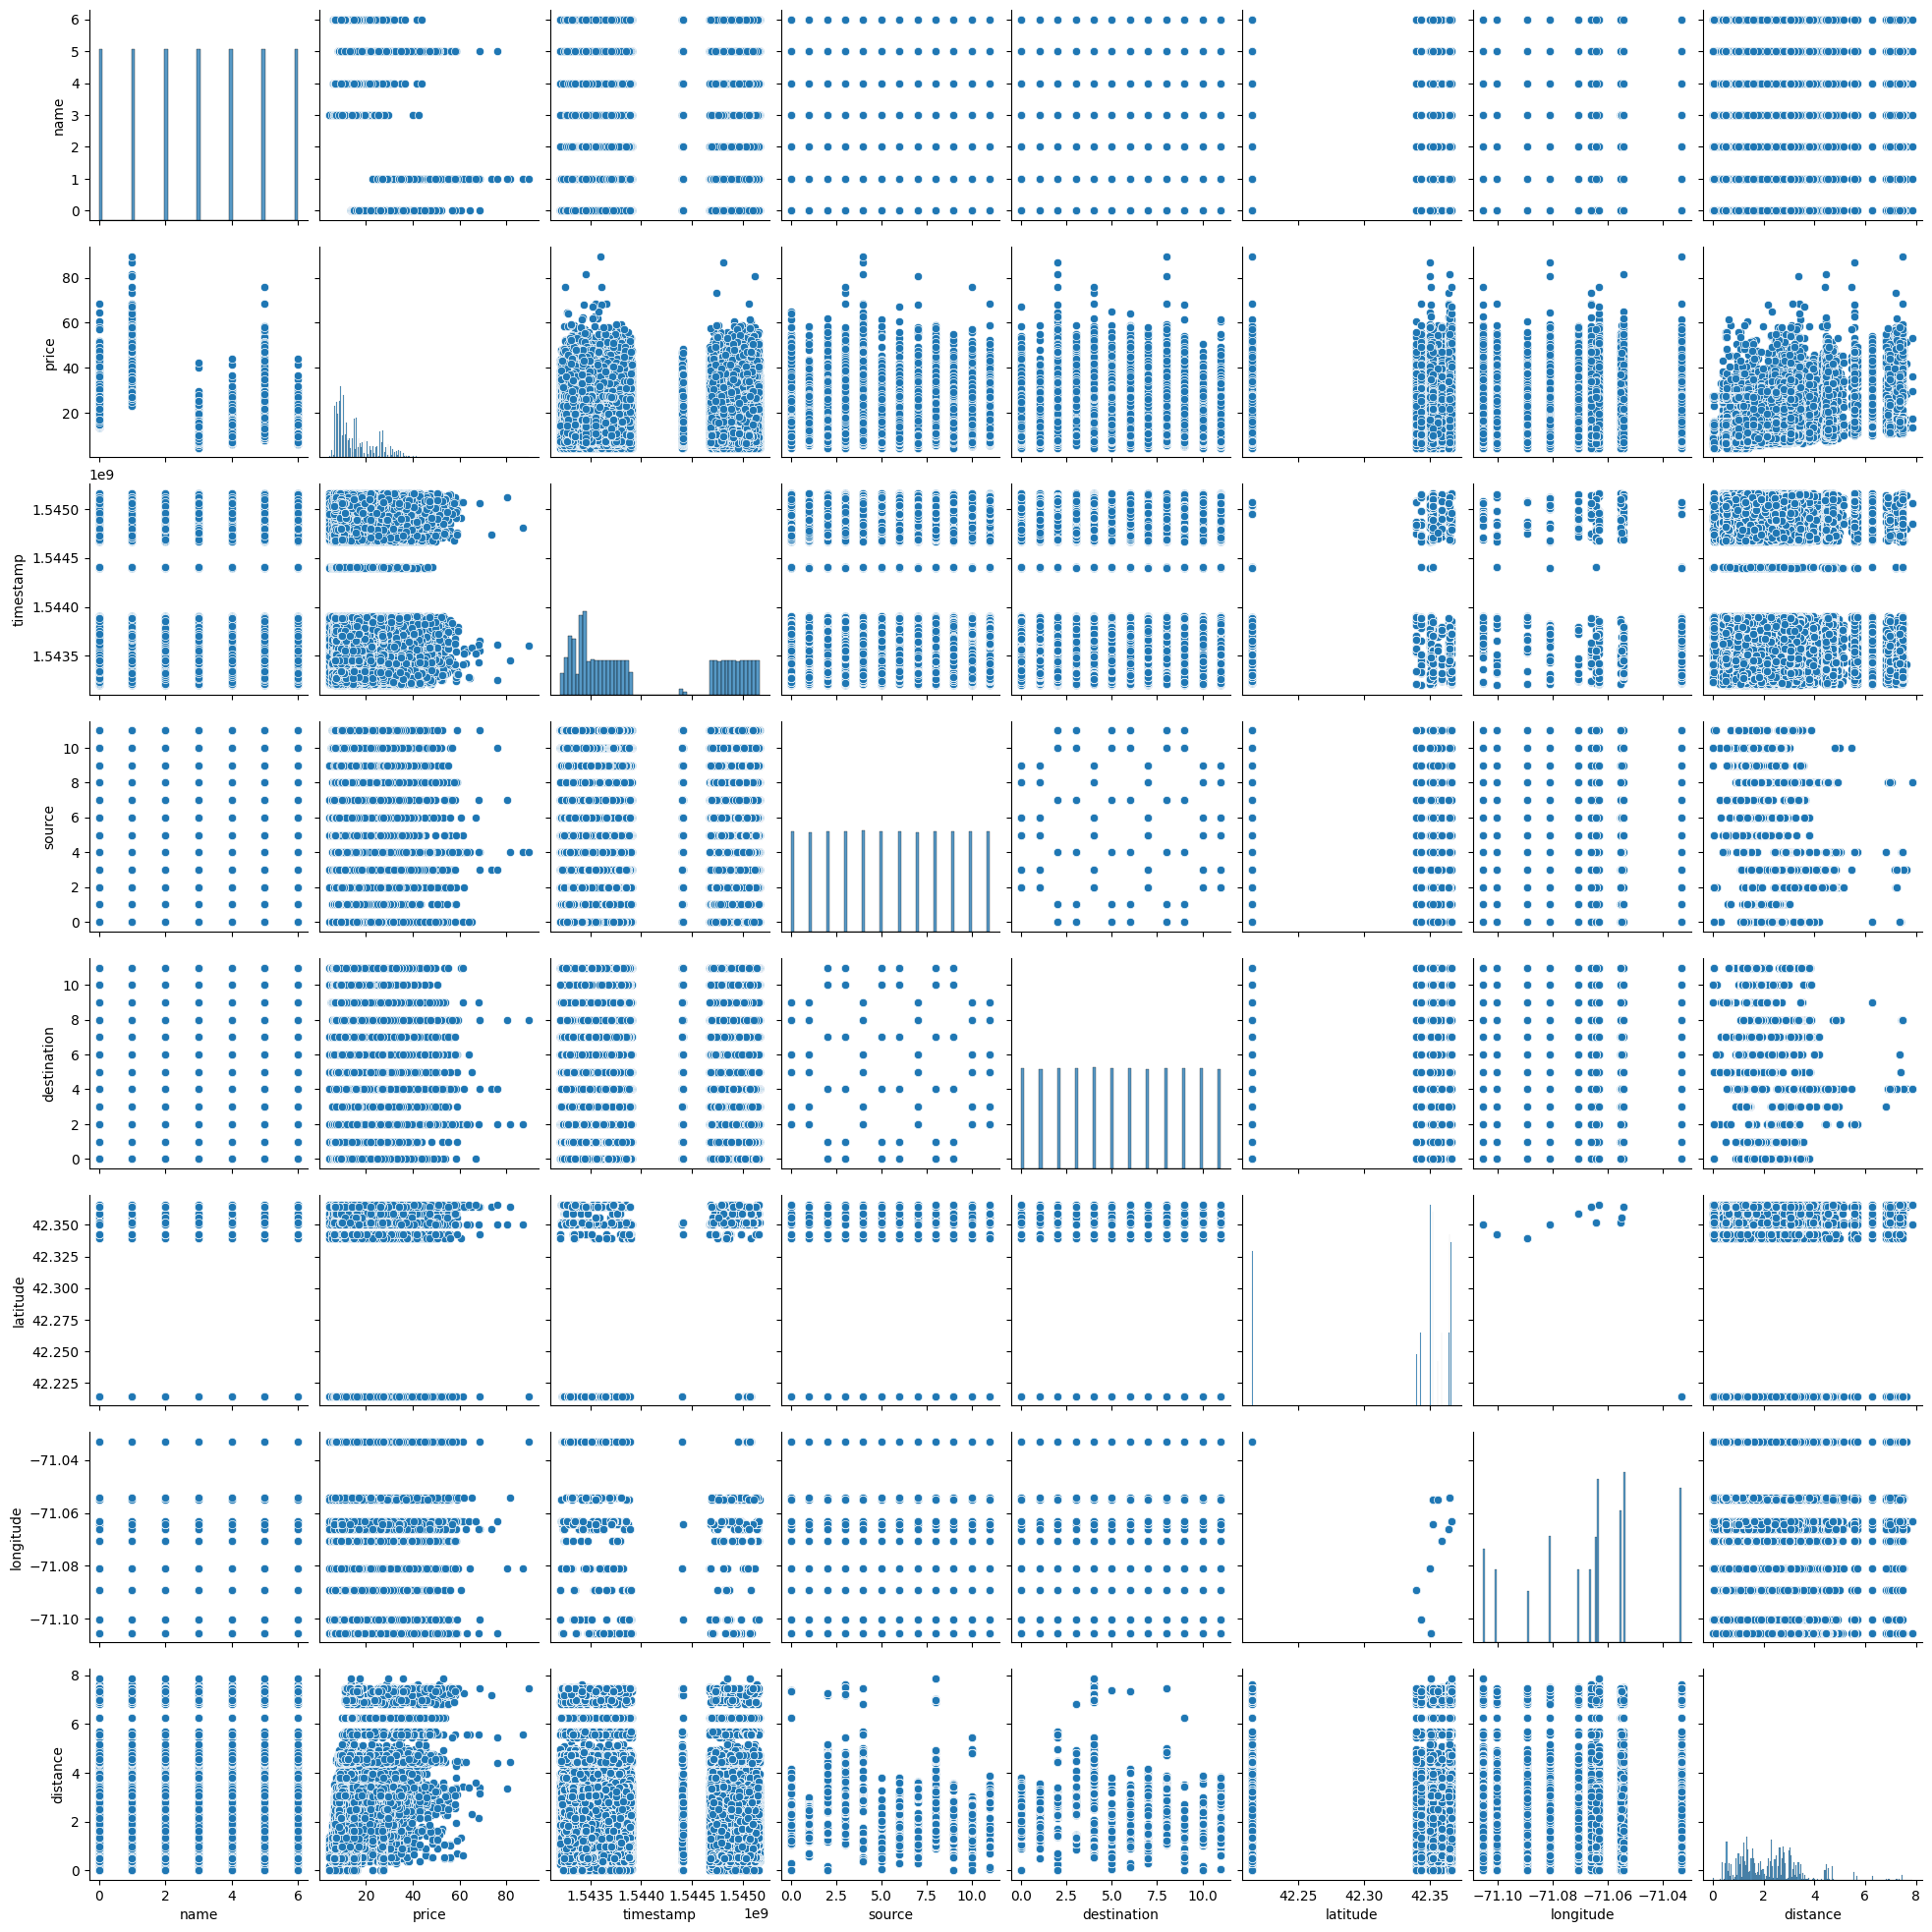

In [8]:
sns.pairplot(complete_df_encoded.drop(columns=["id", "surge_multiplier", "timezone", "datetime"]))

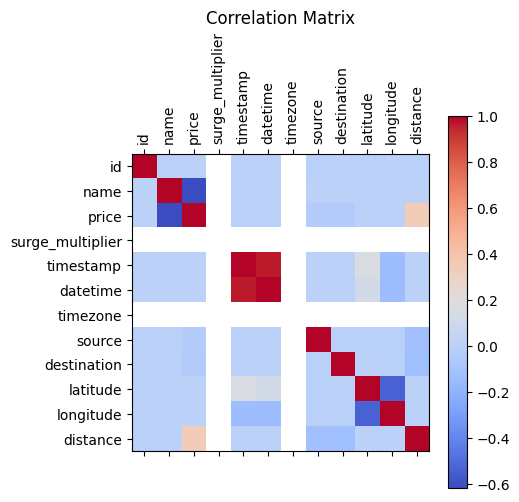

In [9]:
correlation_matrix = complete_df_encoded.corr()
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

<a id="Data_preprocessing"></a>
## Data-preprocessing

Aangezien we al een source en destination kolom hebben, hoeven we de latitude en longitude niet in het model op te nemen. Deze zijn slechts coördinaten en voegen daarom weinig waarde toe. Uit ons onderzoek bleek ook dat alle rijen met de naam "taxi" geen prijs bevatten. We kunnen hiervoor geen prijs toevoegen, omdat we hebben vastgesteld dat er een correlatie is tussen de prijs en de naam.

Daarnaast zullen we dubbele rijen verwijderen om de dataset schoon te houden.

Ook verwijderen we de source en destination kolommen, omdat deze redundant zijn; de afstand tussen deze twee locaties vertegenwoordigt al de onderliggende relatie.

Uit verder onderzoek na het uitvoeren van de modellen blijkt dat de timestamp nauwelijks invloed heeft op het voorspellen van de prijs. Dit is ook zichtbaar in de scatterplot hierboven, waaruit blijkt dat deze feature weinig bijdraagt aan de nauwkeurigheid van het model in vergelijking met andere kenmerken. Verder kunnen we ook waarnemen dat alleen de distance en name kolumnen een correlatie hebben tot de prijs. dit zijn dan ook de enigste features die we gaan gebruiken. 

In [10]:
df_cleaned = df.copy()

In [11]:
df_cleaned = df_cleaned.convert_dtypes()
df_cleaned = df_cleaned[df_cleaned["name"] != "Taxi"]
df_cleaned = df_cleaned.drop_duplicates()

We verwijderen nu de uitschieters door voor elke rij de z-score te berekenen. Vervolgens filteren we de data door alleen de rijen te behouden met een z-score tussen -3 en 2,2 standaarddeviaties.

In [12]:
# calculating Z score for "price" column
df_cleaned = df_cleaned.dropna()
# calculate for each name the average price and standard deviation
price_mean = df_cleaned.groupby("name")["price"].mean()
price_std = df_cleaned.groupby("name")["price"].std()

In [13]:
# remove the rows where the price is more than 3 standard deviations away from the mean
df_cleaned = df_cleaned.join(price_mean, on="name", rsuffix="_mean")
df_cleaned = df_cleaned.join(price_std, on="name", rsuffix="_std")
df_cleaned["price_zscore"] = (df_cleaned["price"] - df_cleaned["price_mean"]) / df_cleaned["price_std"]

df_cleaned = df_cleaned[df_cleaned["price_zscore"] >= -3]
df_cleaned = df_cleaned[df_cleaned["price_zscore"] <= 2.2]

In [14]:
df_cleaned = df_cleaned.drop(columns=["price_mean", "price_std", "price_zscore"])

Deze code zet de categorische waarden in de kolom name om in numerieke labels met behulp van LabelEncoder. Regressie model hebben numerieke inputs nodig

In [15]:
df_cleaned['name'] = LabelEncoder().fit_transform(df_cleaned['name'])

<Axes: title={'center': 'price'}, xlabel='name'>

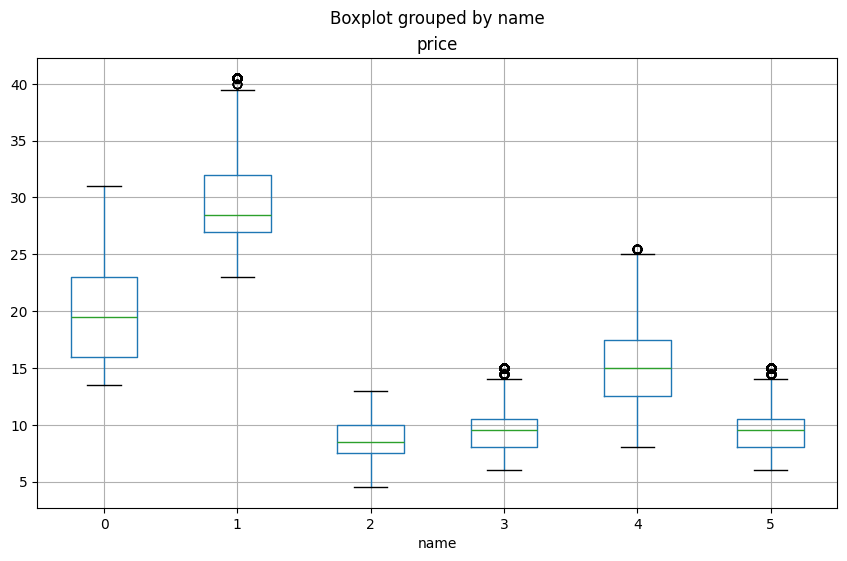

In [16]:
df_cleaned.boxplot(column='price', by="name", figsize=(10, 6))

in deze boxplot zien we dat voor elke naam, in vergelijking met de prijs, vrijwel alle uitschieters zijn verwijderd.

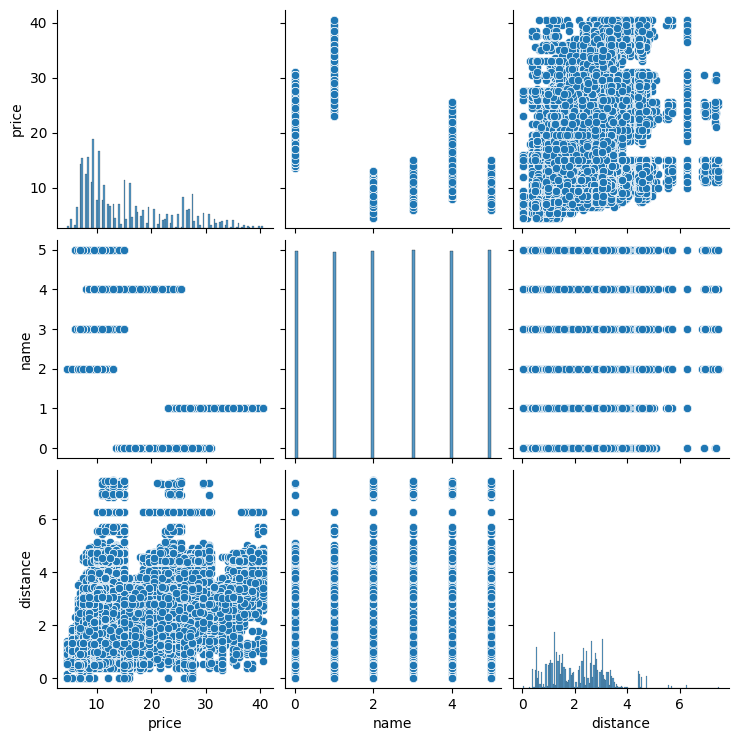

In [17]:
sns.pairplot(df_cleaned[["price", "name", "distance"]])

<a id="Model_creeren"></a>
## Model creëren

In [38]:
df["name"] = LabelEncoder().fit_transform(df["name"])

In [39]:
# X = df_cleaned.drop(["price"], axis=1)
X = df_cleaned[["name", "distance"]]
y = df_cleaned["price"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GridSearchCV: Het vinden van de beste parameters voor ons Decision Tree-model

In deze stap gebruiken we **GridSearchCV** om de optimale parameters voor ons Decision Tree-model te vinden.

> **Let op:** De volgende drie codeblokken kunnen worden overgeslagen omdat dit proces lang kan duren.

De beste parameters voor het regressiemodel zijn al vooraf berekend.

In [ ]:
# get best params using GridSearchCV

param_grid = {
    "bootstrap":[True], 
    "max_depth":[15, 20, 25], 
    "min_samples_leaf":[1, 2, 4, 8], 
    "min_samples_split":[2, 5, 10], 
    "n_estimators":[100, 200]
    }

model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters found by GridSearchCV:{best_params}")

In [41]:
best_params = {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

In [42]:
# Train the model with the best parameters
best_rf = RandomForestRegressor(**best_params, oob_score=True)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=200,
                      oob_score=True)

<a id="Model_evalueren"></a>
### Model evalueren

In deze code wordt het Random Forest-model geëvalueerd op de testdata (X_test). De voorspelde waarden (y_pred) worden vergeleken met de werkelijke waarden (y_test) met behulp van:

- MAE: Gemiddelde absolute fout.
- MSE: Gemiddelde kwadratische fout.
- R²-score: Percentage verklaarde variatie.

Daarnaast wordt de Out-of-Bag (OOB) Score weergegeven als extra maatstaf voor de modelprestaties.

In [43]:
y_pred = best_rf.predict(X_test)

In [44]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"OOB Score: {best_rf.oob_score_}")

Mean Absolute Error: 0.987442719008604
Mean Squared Error: 1.955372470779388
R^2 Score: 0.9704570279328679
OOB Score: 0.9696272592172711


We gaan het model evalueren met de volgende plots: 

- Scatterplot: De linker grafiek toont de relatie tussen de werkelijke (y_test) en voorspelde prijzen (y_pred). Ideaal gezien liggen de punten dicht bij de rode stippellijn, wat zou betekenen dat het model nauwkeurig voorspelt.

- KDE-plot: De rechter grafiek vergelijkt de verdelingen van de werkelijke en voorspelde prijzen met behulp van dichtheidsplots (KDE). Dit laat zien hoe goed de voorspelde verdeling overeenkomt met de werkelijke data.

Deze visualisaties helpen bij het beoordelen van de nauwkeurigheid en betrouwbaarheid van het model.

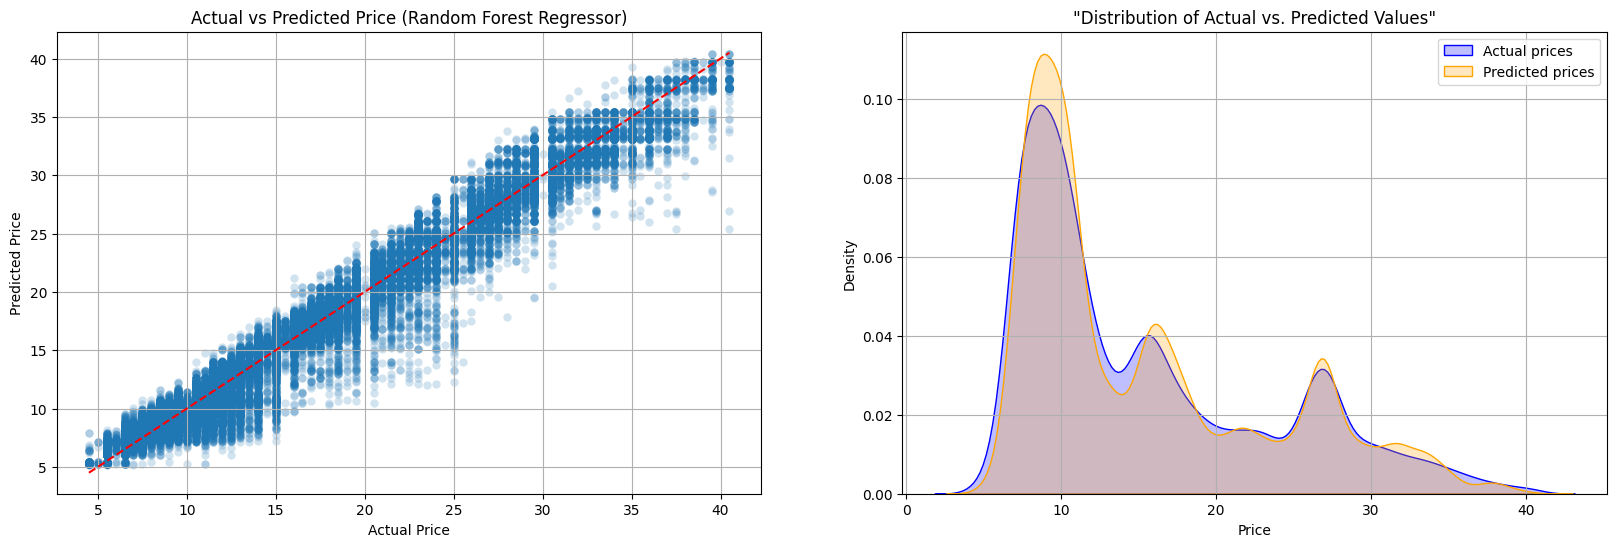

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(y_test, y_pred, alpha=0.2, marker='o', linewidths=0)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[0].grid(True)
ax[0].set_xlabel('Actual Price')
ax[0].set_ylabel('Predicted Price')
ax[0].set_title('Actual vs Predicted Price (Random Forest Regressor)')
sns.kdeplot(y_test, label='Actual prices', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted prices' , fill=True, color='orange')
ax[1].set_xlabel('Price')
ax[1].grid(True)
ax[1].set_ylabel('Density')
ax[1].set_title('"Distribution of Actual vs. Predicted Values"')
ax[1].legend()
plt.show()

In de linker grafiek (scatterplot) zien we dat de voorspelde prijzen over het algemeen dicht bij de werkelijke prijzen liggen, wat blijkt uit de clustering rond de diagonale rode lijn. Dit geeft aan dat het model een sterke overeenkomst heeft tussen de werkelijke en voorspelde waarden.

De rechter grafiek (KDE-plot) laat zien dat de verdelingen van de werkelijke en voorspelde prijzen grotendeels overeenkomen, hoewel er enkele verschillen zijn in bepaalde prijsklassen. Dit wijst erop dat het model de algemene verdeling van de ritprijzen goed weet te benaderen, maar mogelijk moeite heeft met het nauwkeurig voorspellen van sommige prijsklassen.

De bargrafiek geeft weer hoeveel elke feature bijdraagt aan de voorspellende kracht van het model.

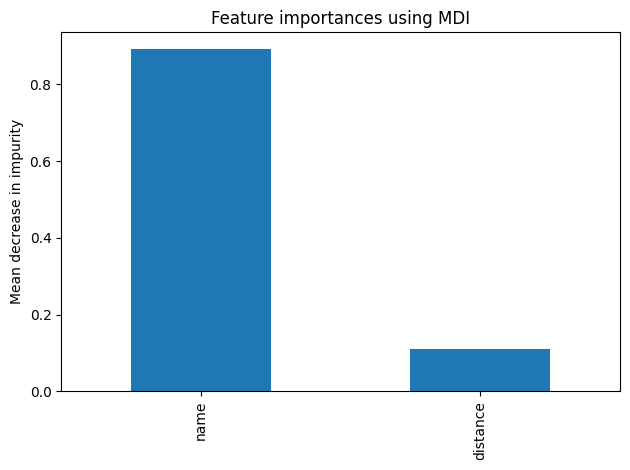

In [28]:
importances = best_rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()


<a id="Andere_modellen_evalueren"></a>
## Snel andere modellen testen

Laten we nu ook snel andere modellen evalueren om te zien of we mogelijk betere resultaten kunnen behalen.
Voor het evalueren van deze modellen kan we dezelfde grafieken begruiken.


GridSearchCV: Het vinden van de beste parameters voor ons KNN model

In deze stap gebruiken we **GridSearchCV** om de optimale parameters voor ons KNN model te vinden.

> **Let op:** De volgende drie codeblokken kunnen worden overgeslagen omdat dit proces lang kan duren.

De beste parameters voor het regressiemodel zijn al vooraf berekend.

In [60]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

In [ ]:
model_knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
print(f"Best parameters found:{best_params}")

In [29]:
best_params = {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

In [30]:
model_knn = KNeighborsRegressor(**best_params)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [31]:
y_pred = model_knn.predict(X_test)

In [35]:
# evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 1.0319947631075457
Mean Squared Error: 2.1121179160752885
R^2 Score: 0.9680888211685673


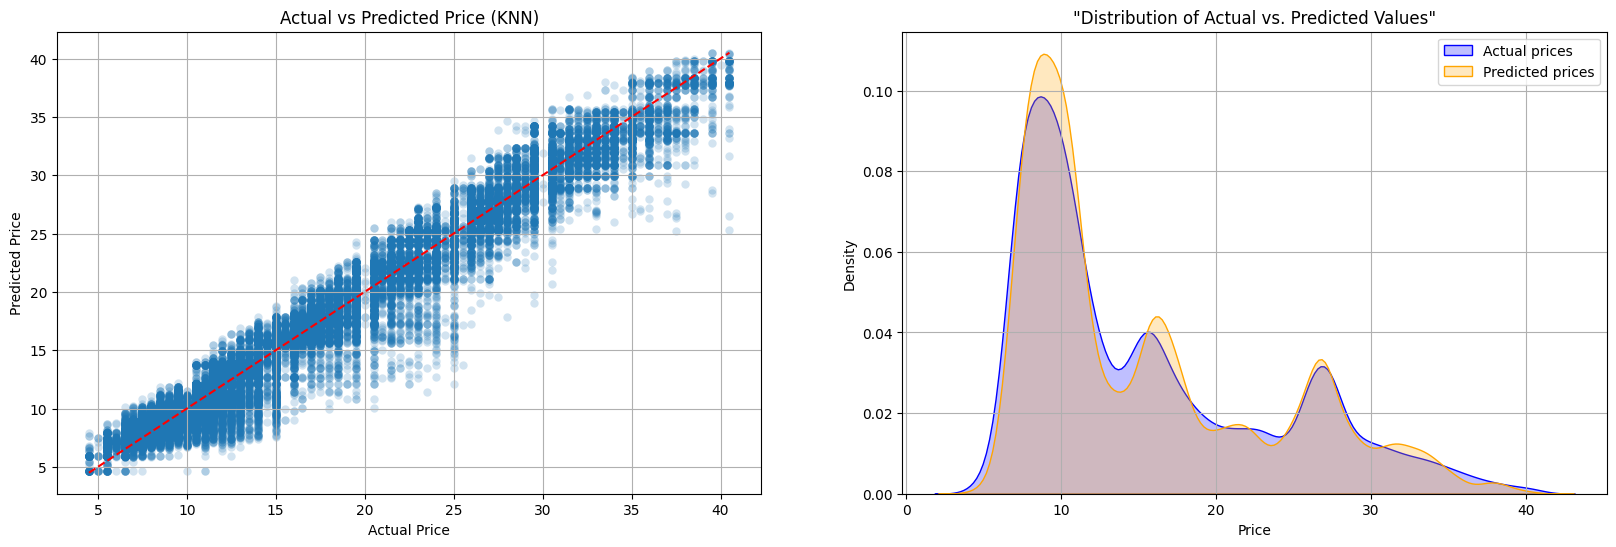

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].scatter(y_test, y_pred, alpha=0.2, marker='o', linewidths=0)
ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
ax[0].grid(True)
ax[0].set_xlabel('Actual Price')
ax[0].set_ylabel('Predicted Price')
ax[0].set_title('Actual vs Predicted Price (KNN)')
sns.kdeplot(y_test, label='Actual prices', fill=True, color='blue')
sns.kdeplot(y_pred, label='Predicted prices' , fill=True, color='orange')
ax[1].set_xlabel('Price')
ax[1].grid(True)
ax[1].set_ylabel('Density')
ax[1].set_title('"Distribution of Actual vs. Predicted Values"')
ax[1].legend()
plt.show()

<a id="Conclusie"></a>
## Conclusie

Het model presteert uitstekend in het voorspellen van de ritprijs, zoals blijkt uit de evaluatiestatistieken en visualisaties. Met een lage Mean Absolute Error (0,99) en Mean Squared Error (1,97) voorspelt het model de prijzen nauwkeurig. De R²-score van 0,97 toont aan dat 97% van de variatie in de ritprijs wordt verklaard door het model. De visualisaties bevestigen deze nauwkeurigheid, met een sterke overeenkomst tussen de werkelijke en voorspelde prijzen. Er is echter nog enige ruimte voor verbetering bij specifieke prijsklassen. 

**Resultaten van de Random Forest Regressor**

- Mean Absolute Error: 0.9873276383536972 
- Mean Squared Error: 1.9550877389699226
- R^2 Score: 0.9704613298364794

**Resultaten van de K Neighbors Regressor**

- Mean Absolute Error: 1.0319947631075457
- Mean Squared Error: 2.1121179160752885
- R^2 Score: 0.9680888211685673


Op basis van de resultaten kunnen we concluderen dat de Random Forest Regressor iets beter presteert dan de K Neighbors Regressor bij het voorspellen van de ritprijs. De Random Forest Regressor heeft een lagere Mean Absolute Error (0.99) en Mean Squared Error (1.96) in vergelijking met de K Neighbors Regressor (MAE: 1.03, MSE: 2.11). Daarnaast heeft de Random Forest een iets hogere R²-score (0.97 versus 0.968), wat aangeeft dat het model net iets beter in staat is om de variatie in de prijs te verklaren. Over het algemeen kunnen we stellen dat beide modellen goed presteren, maar de Random Forest Regressor levert de beste resultaten op.